In [0]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
%cd drive/My\ Drive
!ls

/content/drive/My Drive
 1515074182688366687413.jpg
'1515074182688366687413 - rohit nagotkar.jpg'
 52138
 Abstract_Code_Diggers
 athena.png
'Attendance CA.gsheet'
 Attendance.gsheet
 bar.m.gdoc
'blockchain backend'
'Blockchain work.gdoc'
 Books
 bot.gdoc
 builders.rohit.gsheet
 call.docx
'Class notes.gdoc'
 Classroom
 coco.names
'Colab Notebooks'
'Colleges and schools.gsheet'
'Contacts from whatsapp.xlsx'
'Copy of Marina · SlidesCarnival.gslides'
 cretronix2
 DadContacts@PICTMUNmarketing.xlsx
 data.csv
 Debate.gdoc
'Delegate Agreement.pdf'
 df_wiki_csv.csv
'Document from Rohit'
 drawings
'Electric nose.docx'
'Electric nose.gdoc'
 EMAIL-IDs.gsheet
 ESD.gdoc
 ESMP
 esmp_final_report.gdoc
 EssayForm_Rohit_Nagotkar.docx
'EssayForm_Rohit_Nagotkar - rohit nagotkar.docx'
 exp_1.m
'Expense report.gsheet'
 fer2013.csv
 fill.xlsx
 final.gdoc
 final_weights.h5
 finsoft-networkf.bna
'First Report'
'First Report.gdoc'
'First Report.pdf'
 fnumpy2.npy
'For API call.gdoc'
'Google Photos'
'historic pop

In [0]:
!pip3 install impyute

#Importing libraries

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as mno
from sklearn import linear_model
from sklearn.preprocessing import RobustScaler
from impyute.imputation.cs import mice
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

#Getting the File

In [0]:
data = pd.read_excel('OUTPUT_WBI_exposer.xlsx')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 48 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Unnamed: 0                                           1044 non-null   int64  
 1   SID                                                  1044 non-null   object 
 2   NAME                                                 1044 non-null   object 
 3   ISO                                                  1044 non-null   object 
 4   YEAR                                                 1044 non-null   int64  
 5   BASIN                                                1044 non-null   object 
 6   SUB BASIN                                            1044 non-null   object 
 7   NATURE                                               1044 non-null   object 
 8   ISO_TIME                                             1044 non-null  

#Seperating categorical and numerical columns

In [0]:
print(data.head(5))
data.drop(['ISO_TIME','COORDS'],axis=1,inplace=True)
print("Null Values")
print(data.isnull().sum())
cat_data = data.loc[:,data.dtypes==np.object]
num_data = data.loc[:,data.dtypes!=np.object]
print(cat_data.shape,num_data.shape)

             SID     NAME  ISO  ...  pop_max_50_adj pop_max_64_adj TOTAL_AFFECTED
0  1949163N07145    DELLA  JPN  ...    3.193122e+06   5.339257e+05         194046
1  1950241N23140     JANE  JPN  ...    1.061136e+07   2.985054e+06         642117
2  1951224N12316  CHARLIE  JAM  ...    1.599244e+06   6.550875e+05          20200
3  1951337N09150      AMY  PHL  ...    2.844443e+06   5.896887e+05          60000
4  1952180N05144     EMMA  PHL  ...    2.678770e+06   1.505678e+06            103

[5 rows x 44 columns]
Null Values
SID                                                      0
NAME                                                     0
ISO                                                      0
YEAR                                                     0
BASIN                                                    0
SUB BASIN                                                0
NATURE                                                   0
TOTAL_HRS                                                0
D

#Checking outliers

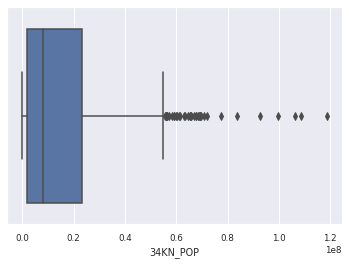

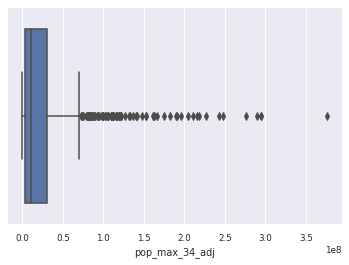

In [0]:
sns.boxplot(x=data['34KN_POP'])
plt.show()
sns.boxplot(x=data['pop_max_34_adj'])
plt.show()

#Scatter plot for outliers in 'pop_max_34_adj','pop_max_50_adj' and 'pop_max_64_adj'

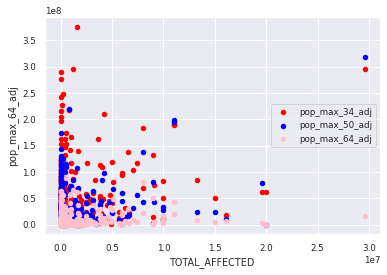

In [0]:

ax = data.plot(kind='scatter',x='TOTAL_AFFECTED',y='pop_max_34_adj',label = 'pop_max_34_adj',color = 'red')
data.plot(kind='scatter',x='TOTAL_AFFECTED',y='pop_max_50_adj',label = 'pop_max_50_adj',color = 'blue',ax=ax)
data.plot(kind='scatter',x='TOTAL_AFFECTED',y='pop_max_64_adj',label = 'pop_max_64_adj',color = 'pink',ax=ax)
plt.show()

#Visualise empty cells

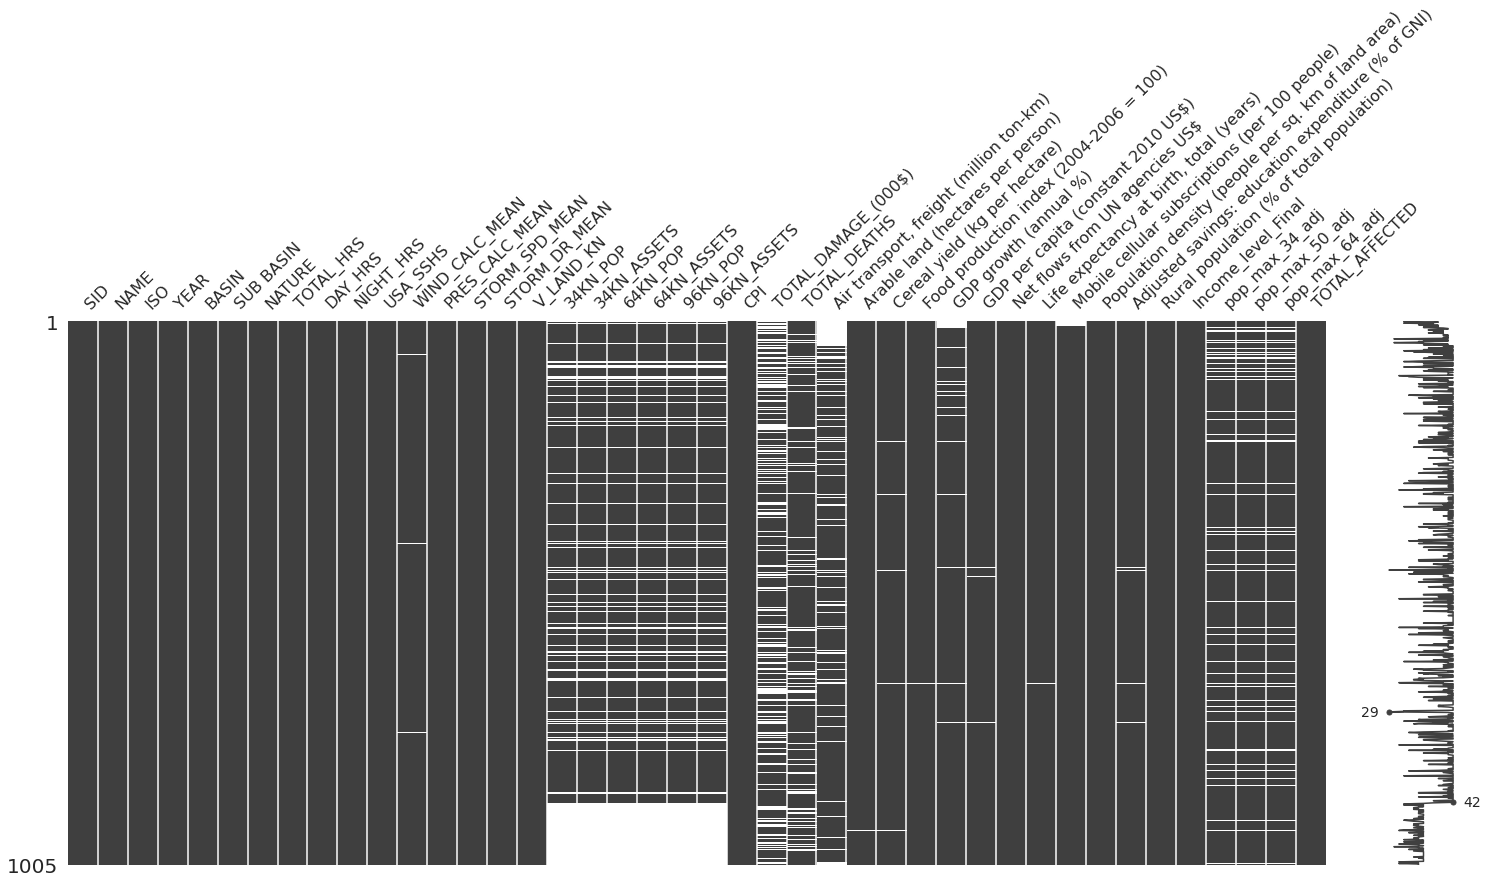

In [0]:
mno.matrix(data)
plt.show()

#Tried running a Multivariate Imputation by Chained Equation (MICE) to fill missing values

In [0]:
missing_columns = ['pop_max_34_adj', 'pop_max_50_adj', 'pop_max_64_adj']
# imputed_training=fast_knn(data[missing_columns].to_numpy(), k=30)

Standardize data using RobustScalar

In [0]:
transformer = RobustScaler().fit(data[missing_columns])
temp=transformer.transform(data[missing_columns])

In [0]:
imputed_training=mice(temp)

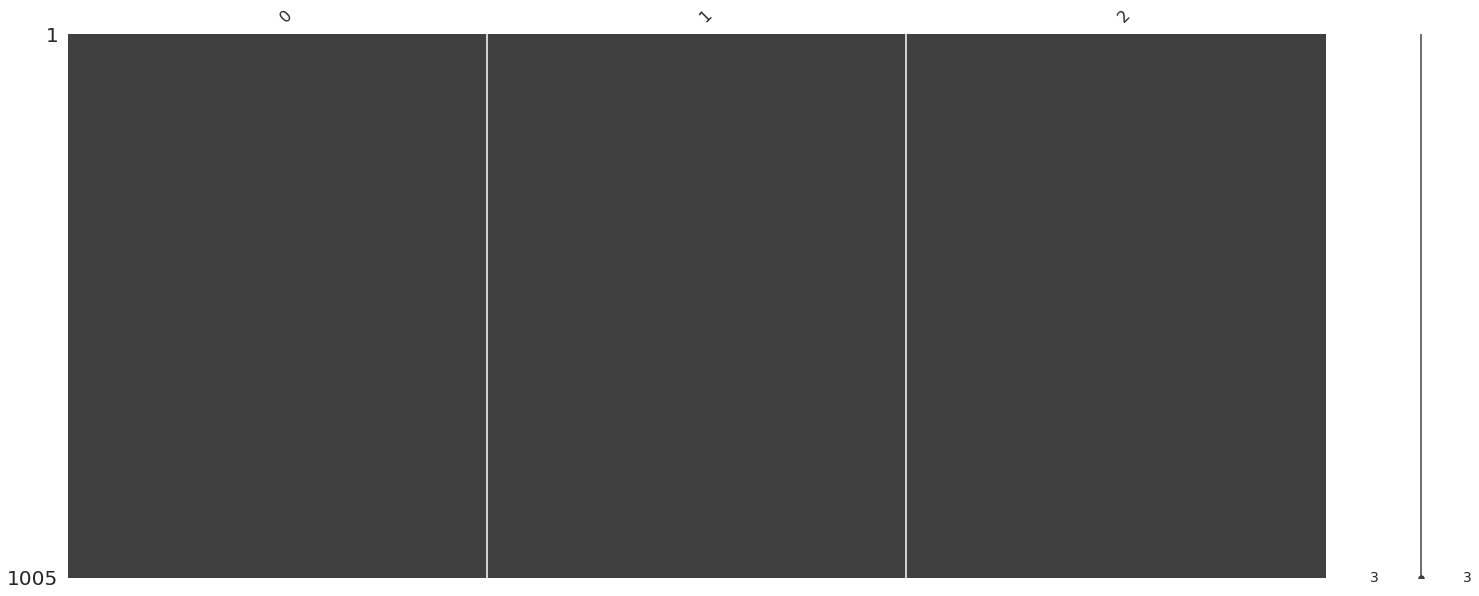

In [0]:
mno.matrix(pd.DataFrame(imputed_training))

#Check types of unique values in categorical data

In [0]:
print('Unique values')
for col in cat_data.columns:
  print("Column -->",col)
  print(len(pd.unique(cat_data[col])))
cat_columns = []

Unique values
Column --> SID
754
Column --> NAME
555
Column --> ISO
63
Column --> BASIN
6
Column --> SUB BASIN
12
Column --> NATURE
6
Column --> Income_level_Final
4


#Basic Label encoding for BASIN and NATURE

In [0]:
print(pd.unique(cat_data['BASIN']))
print(pd.unique(cat_data['NATURE']))
le = LabelEncoder()
cat_data['BASIN'] = le.fit_transform(cat_data['BASIN'])
cat_data['NATURE'] = le.fit_transform(cat_data['NATURE'])
print(pd.unique(cat_data['BASIN']))
print(pd.unique(cat_data['NATURE']))

['WP' 'NAm' 'SP' 'EP' 'SI' 'NI']
['TS' 'ET' 'MX' 'NR' 'SS' 'DS']
[5 1 4 0 3 2]
[5 1 2 3 4 0]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


#Priority encoding for 'Income_level_Final'

In [0]:
labels = {'Low':0, 'Low_Middle':1, 'High':2, 'High_Middle':3}
for itr in range(0,cat_data.shape[0]):
  cat_data['Income_level_Final'].loc[itr] = labels.get(cat_data['Income_level_Final'].loc[itr])
print(pd.unique(cat_data['Income_level_Final']))

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


[0 1 2 3]


#OHE on the columns

In [0]:
columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(), [3,5,6])], remainder='passthrough')
dataset = columnTransformer.fit_transform(cat_data)
cat_data.shape

(1005, 7)

#Creating final categorical dataset

In [0]:
cat_columns = []
for col_name in pd.unique(data['BASIN']):
  cat_columns.append(col_name+"_BASIN")
for col_name in pd.unique(data['NATURE']):
  cat_columns.append(col_name+"_NATURE")
for col_name in pd.unique(data['Income_level_Final']):
  cat_columns.append(col_name+"_Income_level_Final")
print(cat_columns)
cat_columns = cat_columns +['SID','NAME','ISO','SUBBASIN']

d = pd.DataFrame(dataset,columns = cat_columns)



['WP_BASIN', 'NAm_BASIN', 'SP_BASIN', 'EP_BASIN', 'SI_BASIN', 'NI_BASIN', 'TS_NATURE', 'ET_NATURE', 'MX_NATURE', 'NR_NATURE', 'SS_NATURE', 'DS_NATURE', 'Low_Income_level_Final', 'Low_Middle_Income_level_Final', 'High_Income_level_Final', 'High_Middle_Income_level_Final']


In [0]:
d.columns

Index(['WP_BASIN', 'NAm_BASIN', 'SP_BASIN', 'EP_BASIN', 'SI_BASIN', 'NI_BASIN',
       'TS_NATURE', 'ET_NATURE', 'MX_NATURE', 'NR_NATURE', 'SS_NATURE',
       'DS_NATURE', 'Low_Income_level_Final', 'Low_Middle_Income_level_Final',
       'High_Income_level_Final', 'High_Middle_Income_level_Final', 'SID',
       'NAME', 'ISO', 'SUBBASIN'],
      dtype='object')

In [0]:
num_data[missing_columns] = pd.DataFrame(imputed_training,columns=missing_columns)
num_data.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,YEAR,TOTAL_HRS,DAY_HRS,NIGHT_HRS,USA_SSHS,WIND_CALC_MEAN,PRES_CALC_MEAN,STORM_SPD_MEAN,STORM_DR_MEAN,V_LAND_KN,34KN_POP,34KN_ASSETS,64KN_POP,64KN_ASSETS,96KN_POP,96KN_ASSETS,CPI,TOTAL_DAMAGE_(000$),TOTAL_DEATHS,"Air transport, freight (million ton-km)",Arable land (hectares per person),Cereal yield (kg per hectare),Food production index (2004-2006 = 100),GDP growth (annual %),GDP per capita (constant 2010 US$),Net flows from UN agencies US$,"Life expectancy at birth, total (years)",Mobile cellular subscriptions (per 100 people),Population density (people per sq. km of land area),Adjusted savings: education expenditure (% of GNI),Rural population (% of total population),pop_max_34_adj,pop_max_50_adj,pop_max_64_adj,TOTAL_AFFECTED
0,1949,0,0,0,0,39.133333,1000.333333,19.0,91.444444,99.820,NaN,NaN,NaN,NaN,NaN,NaN,9.327572,NaN,419.0,NaN,0.059615,4173.5,67.79,NaN,8607.657082,0.0,67.666098,NaN,258.911917,2.867878,36.728,0.049081,-0.032437,-0.093376,194046
1,1950,6,0,6,-1,76.400000,974.833333,23.0,37.666667,99.820,NaN,NaN,NaN,NaN,NaN,NaN,9.431937,NaN,509.0,NaN,0.059615,4173.5,67.79,NaN,8607.657082,0.0,67.666098,NaN,258.911917,2.867878,36.728,0.654246,0.524842,0.665520,642117
2,1951,15,0,15,1,88.500000,974.500000,15.5,283.500000,132.400,2788659.0,2.148198e+10,2788659.0,2.148198e+10,2552903.0,1.948346e+10,10.175534,56000.0,154.0,NaN,0.100541,868.3,69.93,NaN,3796.219401,0.0,64.770000,NaN,152.453647,2.578304,66.231,-0.322411,-0.152173,-0.055863,20200
3,1951,15,0,15,2,84.488235,979.549020,3.0,161.647059,119.200,20464826.0,1.880000e+11,12675908.0,1.130000e+11,5618193.0,4.897333e+10,10.175534,NaN,569.0,NaN,0.180442,996.3,25.68,NaN,1059.467412,0.0,61.105000,NaN,91.065000,2.757732,69.703,-0.210644,-0.058630,-0.076111,60000
4,1952,3,2,1,1,83.920000,980.600000,10.8,291.400000,110.691,NaN,NaN,NaN,NaN,NaN,NaN,10.410354,NaN,19.0,NaN,0.180442,996.3,25.68,NaN,1059.467412,0.0,61.105000,NaN,91.065000,2.757732,69.703,-0.197247,-0.071076,0.207489,103


#Final dataset

In [0]:
md = pd.concat([d.iloc[:,0:15], num_data],axis=1, sort=False)
print(md.shape, md.columns)
md.head()

(1005, 50) Index(['WP_BASIN', 'NAm_BASIN', 'SP_BASIN', 'EP_BASIN', 'SI_BASIN', 'NI_BASIN',
       'TS_NATURE', 'ET_NATURE', 'MX_NATURE', 'NR_NATURE', 'SS_NATURE',
       'DS_NATURE', 'Low_Income_level_Final', 'Low_Middle_Income_level_Final',
       'High_Income_level_Final', 'YEAR', 'TOTAL_HRS', 'DAY_HRS', 'NIGHT_HRS',
       'USA_SSHS', 'WIND_CALC_MEAN', 'PRES_CALC_MEAN', 'STORM_SPD_MEAN',
       'STORM_DR_MEAN', 'V_LAND_KN', '34KN_POP', '34KN_ASSETS', '64KN_POP',
       '64KN_ASSETS', '96KN_POP', '96KN_ASSETS', 'CPI', 'TOTAL_DAMAGE_(000$)',
       'TOTAL_DEATHS', 'Air transport, freight (million ton-km)',
       'Arable land (hectares per person)', 'Cereal yield (kg per hectare)',
       'Food production index (2004-2006 = 100)', 'GDP growth (annual %)',
       'GDP per capita (constant 2010 US$)', 'Net flows from UN agencies US$',
       'Life expectancy at birth, total (years)',
       'Mobile cellular subscriptions (per 100 people)',
       'Population density (people per sq. km o

,WP_BASIN,NAm_BASIN,SP_BASIN,EP_BASIN,SI_BASIN,NI_BASIN,TS_NATURE,ET_NATURE,MX_NATURE,NR_NATURE,SS_NATURE,DS_NATURE,Low_Income_level_Final,Low_Middle_Income_level_Final,High_Income_level_Final,YEAR,TOTAL_HRS,DAY_HRS,NIGHT_HRS,USA_SSHS,WIND_CALC_MEAN,PRES_CALC_MEAN,STORM_SPD_MEAN,STORM_DR_MEAN,V_LAND_KN,34KN_POP,34KN_ASSETS,64KN_POP,64KN_ASSETS,96KN_POP,96KN_ASSETS,CPI,TOTAL_DAMAGE_(000$),TOTAL_DEATHS,"Air transport, freight (million ton-km)",Arable land (hectares per person),Cereal yield (kg per hectare),Food production index (2004-2006 = 100),GDP growth (annual %),GDP per capita (constant 2010 US$),Net flows from UN agencies US$,"Life expectancy at birth, total (years)",Mobile cellular subscriptions (per 100 people),Population density (people per sq. km of land area),Adjusted savings: education expenditure (% of GNI),Rural population (% of total population),pop_max_34_adj,pop_max_50_adj,pop_max_64_adj,TOTAL_AFFECTED
0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1949,0,0,0,0,39.133333,1000.333333,19.0,91.444444,99.820,NaN,NaN,NaN,NaN,NaN,NaN,9.327572,NaN,419.0,NaN,0.059615,4173.5,67.79,NaN,8607.657082,0.0,67.666098,NaN,258.911917,2.867878,36.728,0.049081,-0.032437,-0.093376,194046
1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1950,6,0,6,-1,76.400000,974.833333,23.0,37.666667,99.820,NaN,NaN,NaN,NaN,NaN,NaN,9.431937,NaN,509.0,NaN,0.059615,4173.5,67.79,NaN,8607.657082,0.0,67.666098,NaN,258.911917,2.867878,36.728,0.654246,0.524842,0.665520,642117
2,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1951,15,0,15,1,88.500000,974.500000,15.5,283.500000,132.400,2788659.0,2.148198e+10,2788659.0,2.148198e+10,2552903.0,1.948346e+10,10.175534,56000.0,154.0,NaN,0.100541,868.3,69.93,NaN,3796.219401,0.0,64.770000,NaN,152.453647,2.578304,66.231,-0.322411,-0.152173,-0.055863,20200
3,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1951,15,0,15,2,84.488235,979.549020,3.0,161.647059,119.200,20464826.0,1.880000e+11,12675908.0,1.130000e+11,5618193.0,4.897333e+10,10.175534,NaN,569.0,NaN,0.180442,996.3,25.68,NaN,1059.467412,0.0,61.105000,NaN,91.065000,2.757732,69.703,-0.210644,-0.058630,-0.076111,60000
4,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1952,3,2,1,1,83.920000,980.600000,10.8,291.400000,110.691,NaN,NaN,NaN,NaN,NaN,NaN,10.410354,NaN,19.0,NaN,0.180442,996.3,25.68,NaN,1059.467412,0.0,61.105000,NaN,91.065000,2.757732,69.703,-0.197247,-0.071076,0.207489,103


# Correlation of all columns with Total affected

PEARSON CORRELATION


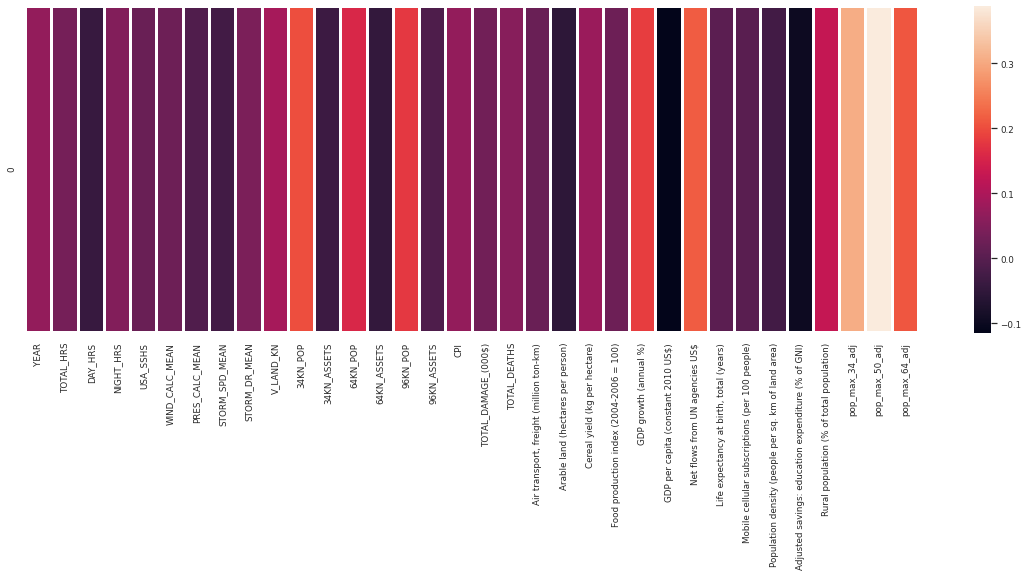

Kendall Tau CORRELATION


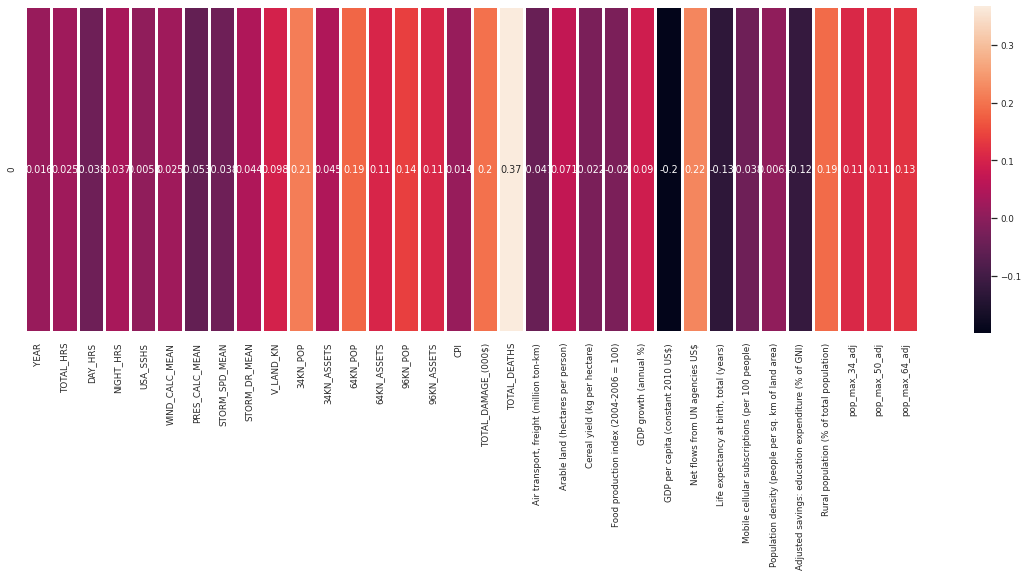

Spearman rank CORRELATION


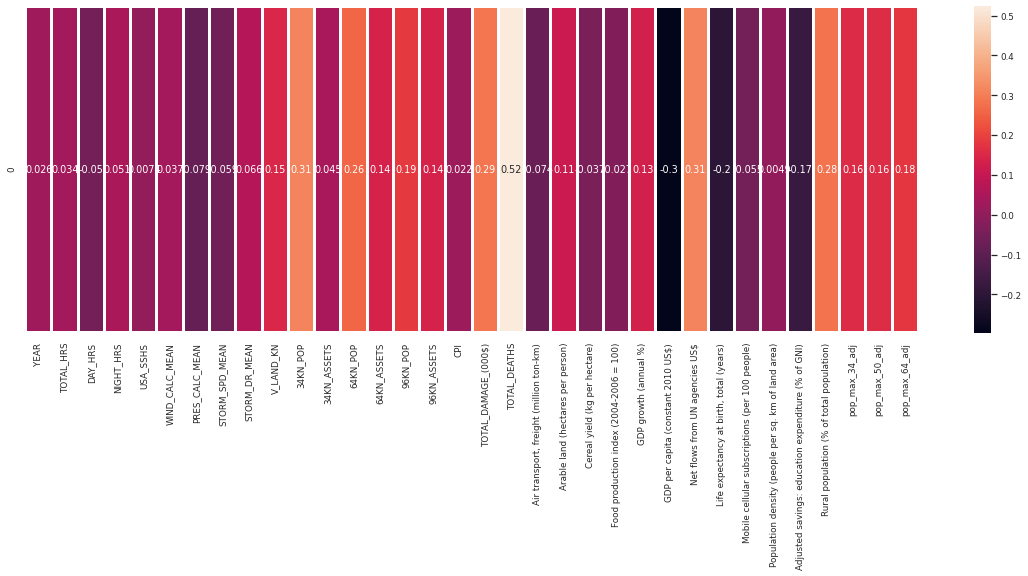

In [0]:
plt.figure(figsize=(20,6))
cols = dict(md.iloc[:,0:49].corrwith(md.iloc[:,-1],method='pearson'))
print('PEARSON CORRELATION')
d1 = np.asarray(md.iloc[:,0:49].corrwith(md.iloc[:,-1],method='pearson'))
sns.heatmap([d1], cbar=True, linewidths=2,xticklabels=cols.keys())
plt.show()
print('Kendall Tau CORRELATION')
plt.figure(figsize=(20,6))
d2 = np.asarray(md.iloc[:,0:49].corrwith(md.iloc[:,-1],method='kendall'))
sns.heatmap([d2], cbar=True, linewidths=2,xticklabels=cols.keys(),annot=True)
plt.show()
print('Spearman rank CORRELATION')
plt.figure(figsize=(20,6))
d3 = np.asarray(md.iloc[:,0:49].corrwith(md.iloc[:,-1],method='spearman'))
sns.heatmap([d3], cbar=True, linewidths=2,xticklabels=cols.keys(),annot=True)
plt.show()

In [0]:
md.drop(['WIND_CALC_MEAN'],axis= 1,inplace=True)
md.isnull().sum()

WP_BASIN                                                 0
NAm_BASIN                                                0
SP_BASIN                                                 0
EP_BASIN                                                 0
SI_BASIN                                                 0
NI_BASIN                                                 0
TS_NATURE                                                0
ET_NATURE                                                0
MX_NATURE                                                0
NR_NATURE                                                0
SS_NATURE                                                0
DS_NATURE                                                0
Low_Income_level_Final                                   0
Low_Middle_Income_level_Final                            0
High_Income_level_Final                                  0
YEAR                                                     0
TOTAL_HRS                                               

#Normalizing data

In [0]:
# notnull_cols = ['34KN_POP', '34KN_ASSETS', '64KN_POP', '64KN_ASSETS',
#        '96KN_POP', '96KN_ASSETS',
#        'Air transport, freight (million ton-km)',
#        'Arable land (hectares per person)', 'Cereal yield (kg per hectare)',
#        'Food production index (2004-2006 = 100)', 'GDP growth (annual %)',
#        'GDP per capita (constant 2010 US$)','Life expectancy at birth, total (years)','Mobile cellular subscriptions (per 100 people)', 'Adjusted savings: education expenditure (% of GNI)']
# RS = RobustScaler()
# temp= RS.fit_transform(md[notnull_cols])
# filled_ds=mice(temp)
# md[notnull_cols]=pd.DataFrame(filled_ds,columns=notnull_cols)

#Filling empty cells of 'TOTAL_DAMAGE_(000$)' and 'TOTAL_DEATHS'

In [0]:
for itr in range(0,len(md['TOTAL_DAMAGE_(000$)'])):
  if(np.isnan(md['TOTAL_DAMAGE_(000$)'].iloc[itr])):
    md['TOTAL_DAMAGE_(000$)'] = 0
  if(np.isnan(md['TOTAL_DEATHS'].iloc[itr])):
    md['TOTAL_DEATHS'] = 0

In [0]:
md.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005 entries, 0 to 1004
Data columns (total 49 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   WP_BASIN                                             1005 non-null   object 
 1   NAm_BASIN                                            1005 non-null   object 
 2   SP_BASIN                                             1005 non-null   object 
 3   EP_BASIN                                             1005 non-null   object 
 4   SI_BASIN                                             1005 non-null   object 
 5   NI_BASIN                                             1005 non-null   object 
 6   TS_NATURE                                            1005 non-null   object 
 7   ET_NATURE                                            1005 non-null   object 
 8   MX_NATURE                                            1005 non-null  

In [0]:
md.drop(['34KN_POP','34KN_ASSETS','64KN_POP','64KN_ASSETS','96KN_POP','96KN_ASSETS'],axis=1, inplace=True)
md.isnull().sum()

WP_BASIN                                                 0
NAm_BASIN                                                0
SP_BASIN                                                 0
EP_BASIN                                                 0
SI_BASIN                                                 0
NI_BASIN                                                 0
TS_NATURE                                                0
ET_NATURE                                                0
MX_NATURE                                                0
NR_NATURE                                                0
SS_NATURE                                                0
DS_NATURE                                                0
Low_Income_level_Final                                   0
Low_Middle_Income_level_Final                            0
High_Income_level_Final                                  0
YEAR                                                     0
TOTAL_HRS                                               

#SVR Model

In [0]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

##Dropping null rows

In [0]:
print(md.shape)
md.dropna(inplace=True)
md.shape

(1005, 43)


(837, 43)

## Seperating X and Y

In [0]:
X =  md.iloc[:,0:42]
Y = md.iloc[:,-1]
Y = np.reshape(Y.values,(Y.shape[0],1))
X.head()

,WP_BASIN,NAm_BASIN,SP_BASIN,EP_BASIN,SI_BASIN,NI_BASIN,TS_NATURE,ET_NATURE,MX_NATURE,NR_NATURE,SS_NATURE,DS_NATURE,Low_Income_level_Final,Low_Middle_Income_level_Final,High_Income_level_Final,YEAR,TOTAL_HRS,DAY_HRS,NIGHT_HRS,USA_SSHS,PRES_CALC_MEAN,STORM_SPD_MEAN,STORM_DR_MEAN,V_LAND_KN,CPI,TOTAL_DAMAGE_(000$),TOTAL_DEATHS,"Air transport, freight (million ton-km)",Arable land (hectares per person),Cereal yield (kg per hectare),Food production index (2004-2006 = 100),GDP growth (annual %),GDP per capita (constant 2010 US$),Net flows from UN agencies US$,"Life expectancy at birth, total (years)",Mobile cellular subscriptions (per 100 people),Population density (people per sq. km of land area),Adjusted savings: education expenditure (% of GNI),Rural population (% of total population),pop_max_34_adj,pop_max_50_adj,pop_max_64_adj
44,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1970,0,0,0,-1,0.000000,8.111111,178.888889,124.19,15.186335,0,0,6.900000,0.313246,1857.8,59.86,5.276456,853.631461,2929999.903,44.771,0.0,11.308431,2.800000,85.900,-0.323359,-0.222367,-0.147308
46,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1970,21,0,21,4,933.961538,11.076923,289.846154,152.40,15.186335,0,0,21.700001,0.130434,1350.3,34.36,3.764605,1257.036642,4660000.056,63.155,0.0,120.041554,2.757732,67.021,-0.166899,-0.170314,-0.186207
47,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1970,0,0,0,4,937.875000,16.100000,273.800000,138.20,15.186335,0,0,21.700001,0.130434,1350.3,34.36,3.764605,1257.036642,4660000.056,63.155,0.0,120.041554,2.757732,67.021,0.303216,0.544134,-0.150738
49,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1971,9,0,9,1,972.115385,14.230769,285.461539,118.10,15.838255,0,0,31.600000,0.126026,1272.2,35.81,5.428631,1287.654850,7110000.014,63.190,0.0,123.548833,2.800000,66.507,0.291037,0.021664,0.011706
51,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1971,15,12,3,0,989.105556,13.266667,289.800000,63.40,15.838255,0,0,31.600000,0.126026,1272.2,35.81,5.428631,1287.654850,7110000.014,63.190,0.0,123.548833,2.800000,66.507,0.011036,-0.150601,-0.072687


In [0]:
regressor = SVR(kernel='poly',tol=0.01)#, C=1.32, gamma='auto',epsilon=0.1)
X_train, X_test, y_train, y_test = train_test_split(
    X,Y, test_size=0.3, random_state=42)

# y_pred = regressor.predict(X_test)


In [0]:
regressor.fit(X_train,y_train.ravel())

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.01, verbose=False)

In [0]:
regressor.score(X_test,y_test)

-0.0616551293102201